# NLP

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/

En esa competencia de Kaggle también puedes encontrar Notebooks (*kernels*) sumamente interesantes.

El objetivo es que se familiaricen con algunas herramientas típicas del Procesamiento del Lenguaje Natural (NLP por sus siglas en inglés).La biblioteca fundamental que vamos a usar es NLTK. Probablemente tengas que instalarla. Para ello, googlea cómo instalar esta librería con Conda (no olvides activar el ambiente).

Ten en cuenta que la mayoría de las herramientas de NLP pueden ser consideradas como parte del preprocesamiento, llevar el texto a una forma que la computadora pueda entender. En general, esto corresponde a una forma tipo "tabla" al estilo de los DataFrames de Pandas. Es fácil olvidarse de ese objetivo y perderse en todos los pasos. Al principio es común marearse, pero no te preocupes que verás que no es difícil.


## 1. Carga de datos

Lo primero que tienes que hacer es fijarse en qué formato están los datos. ¿De qué se trata es formato?¿Cómo se abre? Si googleas, vas a ver que hay muchas formas de abrir archivos JSON con Python. Como venimos trabajando con Pandas, googlea "Open JSON with Pandas". Prueben esa función. Si les tira un error en el primer intento, googleen el error. Les aseguramos que la respuesta está muy a mano y es muy accesible, no tienen que hacer nada raro.

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moreno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
path_data = "..\\data\\original\\"

In [4]:
dataset = pd.read_json(path_data +'Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


¿Qué forma tiene el dataset?¿Cuántas instancias?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?¿Podemos hablar ya de *features*?

In [ ]:
dataset.shape

C:\ProgramData\Anaconda3\envs\acamica\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


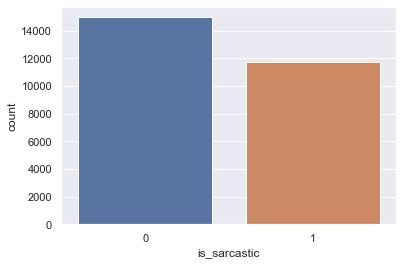

In [5]:
sns.countplot(dataset.is_sarcastic)
plt.show()

## 2. Breve exploración del dataset

Elige una instancia del dataset al azar y selecciona el *headline*.

In [8]:
index_random = np.random.randint(0,high = dataset.shape[0])
titular = dataset.iloc[index_random].headline
print(index_random, titular)

24583 66-year-old 'washington post' reporter hopes he liveblogged state of the union right


¿Te parece que es sarcástico?¿Qué características del texto te hace creer - o no - eso? Comprueba si es sarcástico o no imprimiendo en la celda de abajo el valor correspondiente del dataset. (Como la mayoría de los titulares están en inglés y encima refieren a política local, no te preocupes si es una tarea difícil).

In [9]:
print(index_random, dataset.iloc[index_random].is_sarcastic)

24583 1


## 3. NLTK

Si es difícil para algunos humanos detectar el sarcasmo, probablemente también lo sea para una computadora. De todas formas, se puede hacer el intento. Para ello, es necesario extraer características de cada texto que nos sirvan para ir apuntando al objetivo. En los videos de Acámica hay muchos ejemplo de herramientas para aplicar. Elegir un titular que les llame la atención y probar las siguientes herramientas:

### Tokenización

¿Qué es y para qué sirve?¿Cuáles de todas las formas de tokenización presentadas te parece más útil para este problema?

1. `sent_tokenize`

In [11]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

["66-year-old 'washington post' reporter hopes he liveblogged state of the union right"]

2. `word_tokenize`

In [ ]:
titular_wt = nltk.COMPLETAR
titular_wt

### Normalización

¿Qué es y para qué sirve? Notar que varias formas de normalización ya vienen aplicadas en el dataset.

1. Stopwords

Importar los `stopwords` del inglés e imprimirlos.

In [12]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['66-year-old',
 "'washington",
 'post',
 "'",
 'reporter',
 'hopes',
 'he',
 'liveblogged',
 'state',
 'of',
 'the',
 'union',
 'right']

¿Les parece conveniente aplicar todos los stopwords que aparecen en esa lista?

Eliminar del titular elegido los stopwords.

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'myself' not in palabra]
stopwords

['i',
 'me',
 'my',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',


In [14]:
titular_wt_sin_sw = [i for i in titular_wt if i not in stopwords]
titular_wt_sin_sw

['66-year-old',
 "'washington",
 'post',
 "'",
 'reporter',
 'hopes',
 'liveblogged',
 'state',
 'union',
 'right']

¿Cuál o cuáles palabras se fueron?

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, usar `nltk` para extrar la frecuencia con que aparece cada palabras. ¿Tiene sentido esto para titulares?

In [15]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'66-year-old': 1, "'washington": 1, 'post': 1, "'": 1, 'reporter': 1, 'hopes': 1, 'liveblogged': 1, 'state': 1, 'union': 1, 'right': 1})

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del dataset en su conjunto. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno. Recuerden usar máscaras.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.

#### No-Sarcasmo

In [ ]:
dataset_no_sarcasmo = dataset[COMPLETAR]
dataset_no_sarcasmo.head()

In [ ]:
todos_titulares_no_sarcasmo = COMPLETAR
for i in range(dataset_no_sarcasmo.shape[0]):
    titular = COMPLETAR #seleccionar el titular
    titular = COMPLETAR # Tokenizar con RegexpTokenizer
    titular = COMPLETAR # Filtrar por stopwords
    todos_titulares_no_sarcasmo.COMPLETAR(COMPLETAR) #agregar el resultado a la lista

In [ ]:
# Esta celda convierte una lista de listas en una unica lista
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo

In [ ]:
#FreqDist
freq_no_sarcasmo = nltk.COMPLETAR(COMPLETAR)
freq_no_sarcasmo

In [ ]:
# googlear: how to get pandas dataframe from freqdist
df_no_sarcasmo = COMPLETAR
df_no_sarcasmo.head()

In [ ]:
# ordenar por frecuencia
df_no_sarcasmo.COMPLETAR(COMPLETAR)
df_no_sarcasmo.head()

In [ ]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Sarcasmo

In [ ]:
dataset_sarcasmo = COMPLETAR
dataset_sarcasmo.head()

In [ ]:
COMPLETAR

In [ ]:
todos_titulares_sarcasmo = COMPLETAR
todos_titulares_sarcasmo

In [ ]:
freq_sarcasmo = COMPLETAR
freq_sarcasmo

In [ ]:
df_sarcasmo = COMPLETAR
df_sarcasmo.head()

In [ ]:
df_sarcasmo.COMPLETAR
df_sarcasmo.head()

In [ ]:
df_sarcasmo.COMPLETAR
df_sarcasmo.head()

In [ ]:
plt.figure(figsize = (15,8))
COMPLETAR

In [ ]:
filtrar = []
if False:
    filtrar.append("u")
    filtrar.append("new")

## 4. Stemming
Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a como estan conjugadas, la computadora puede tratarlas como palabras distintas. Pero, en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.

a. Importar nuevamente el dataset completo

In [ ]:
dataset = COMPLETAR
dataset.head()

b. Tomar del `dataset` solo las columnas de interes

In [ ]:
dataset = COMPLETAR
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

c. Antes de realizar el proceso de Stemming, vamos a normalizar el texto de la manera que ya estuvimos viendo. Le agregamos en este caso el uso de la libreria `re`, que nos permite sacar del texto todos los caracteres que no sean palabras. Notemos que hay veces que no conviene quitar estos caracteres ya que, por ejemplo, no podremos distiguir preguntas (?) o exclamaciones (!).

In [ ]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.COMPLETAR

In [ ]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.COMPLETAR
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [COMPLETAR for COMPLETAR in COMPLETAR if not COMPLETAR in COMPLETAR]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular = [stemmer.stem(COMPLETAR) for COMPLETAR in COMPLETAR]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(COMPLETAR)

d. Agregamos al dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [ ]:
dataset["titular_stem"] = COMPLETAR
dataset.tail()

e. Armamos un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [ ]:
dataset_stem = COMPLETAR
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

## 5. Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet` que se encuentra en la solapa 'corpora' y las librerias 'maxent_treebank_pos_' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [ ]:
nltk.download()

In [ ]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Veamos cómo actúa el lemmatizer sobre una frase de ejemplo.

In [ ]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todo lo que no sean letras
frase = COMPLETAR
# Pasamos a minúsculas
frase = COMPLETAR
# Tokenizamos
frase_tokens = COMPLETAR

# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra,wordnet_lemmatizer.lemmatize(palabra)))

¿Te sorprende lo que paso? No cambiaron casi nada (solo se fueron las "s" del final). El problema es que precisamos darle información extra al Lemmatizer, decirle qué rol está cumpliendo la palabra en la oración. Si se fijan en la documentación, esto se hace pasandole un argumento extra a la función llamado POS (Part Of Speech).

Hay distintos metodos que intentan averiguar el rol que cumple una palabra en una oración. Nosotros vamos a utilizar uno que viene incorporado en NLTK llamado pos_tag.

In [ ]:
print(nltk.pos_tag(frase_tokens))

Las etiquetas refieren al tipo de palabra. Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Veamos finalmente como funciona en nuestro ejemplo.

In [ ]:
frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(frase)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(frase)]

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))

a. Ahora te toca aplicar todo esto a nuestro dataset. Vamos a volver a importarlo y hacer un procedimiento análogo al que hicimos para la parte de Stemming.

In [ ]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = COMPLETAR
dataset = COMPLETAR
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = COMPLETAR

In [ ]:
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular = COMPLETAR
    # Pasamos todo a minúsculas
    titular = COMPLETAR
    # Tokenizamos para separar las palabras
    titular = COMPLETAR
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = COMPLETAR
    # Sacamos las Stopwords
    titular = COMPLETAR
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [ ]:
dataset["titular_lemm"] = COMPLETAR
dataset.tail()

b. Por último nos armamos un nuevo datasate llamado `dataset_lem` que tenga solo las columnas `titular_lemm` y `is_sarcastic`.

In [ ]:
dataset_lemm = COMPLETAR
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

**Para mirar**: toma algunos titulares al azar y compara su versión `dataset_lemm` y en `dataset_stem`. Explica.

## 6. Vectorizar

Hasta ahora, tenemos un grupo de palabras por cada titular (bag of words), ya sea *lemmatizado* o *stemmizado*. ¿Te parece que esto servirá para entrenar modelos? La idea ahora es representar esta lista de palabras como un vector. Para esto vamos a utilizar la función `CountVectorizer` de Scikit-Learn. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

a. Tomamos la lista de palabras y el vector que nos dice si es o no sarcástico el título

In [ ]:
# Tomamso la lista de palabras y el vector que nos dice si es o no sarcastico el titulo
list_titulos = list(COMPLETAR)
is_sarc = COMPLETAR

## Para probar con Stemmizer:
#list_titulos = list(dataset_stem'titular_stem'].values)
#is_sarc = dataset_stem['is_sarcastic'].values

b. Preparamos el conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros. Les recomendamos fuertemente leer su documentación.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

Notemos que desde `CountVectorizer` se pueden quitar las stopwords (algo que ya hicimos con `nltk`) e incluir los n_gramas automáticamente.

c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.

In [ ]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

## 7. Modelar

Ahora sí estamos listos para usar todo nuestro conocimiento de modelos en este set de datos. Tengamos en cuenta que, dependiendo el número de palabras (features) que hayamos elegido, los modelos pueden tardar un rato en entrenarse.

a. Primero, como siempre, separamos en test y train.

In [ ]:
x = matriz_titulos.toarray()
y = is_sarc

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Tambien definimos una función que nos permite plotear los resultados en una matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Empecemos por un simple Naive Bayes para tener un benchmark de referencia para el accuracy.

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)

print("acc : ", COMPLETAR)

b. Veamos cómo queda graficada la matriz de confusión:

In [ ]:
y_pred = COMPLETAR
confusion(ytest,y_pred)

### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = COMPLETAR
rf.fit(COMPLETAR)

print("acc : ", COMPLETAR)

b. Grafiquen su matriz de confusión:

In [ ]:
y_pred = COMPLETAR
confusion(ytest,y_pred)

c. Habíamos dicho que algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

In [ ]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [ ]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(COMPLETAR)

print("acc : ", COMPLETAR)

b. Grafiquen su matrz de confusión:

In [ ]:
y_pred = COMPLETAR
confusion(ytest,y_pred)

## 7. Explora las posibilidades

Si llegaste hasta acá, ya cuentas con todas las herramientas para poder explorar qué sucede con el poder predictivo cuando van cambiando la manera en que procesas y vectorizas el texto. Algunas sugerencias para explorar son las siguientes:

1. Prueba con Stemmizar en vez de lemmantizar
1. Cambia el numero de features que esta tomando.
1. Prueba con TF-IDF.
1. Incluye los 2-gramas. ¿Qué era eso?
1. Conserve los signos de exclamación y pregunta del texto.
